## 1. Dense

## Cifar-10

In [1]:
from tensorflow import keras as k
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import os
from matplotlib import pyplot as plt

In [ ]:
num_classes = 10
epochs = 10

In [48]:
## Helper functions

def load_data(verbose=False):
    (x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()

    # Normalization
    mean = np.mean(x_train,axis=(0, 1, 2, 3))
    std = np.std(x_train,axis=(0, 1, 2, 3))
    x_train = (x_train-mean) / (std + 1e-7)
    x_test = (x_test-mean) / (std + 1e-7)

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    
    # Image to matrix
    B_train, B_test = x_train.shape[0], x_test.shape[0]

    x_train = x_train.reshape(B_train, np.prod(x_train.shape[1:]))
    x_test  = x_test.reshape(B_test, np.prod(x_test.shape[1:]))

    # Categorize classes
    y_train = k.utils.to_categorical(y_train, num_classes)
    y_test  = k.utils.to_categorical(y_test, num_classes)

    if verbose:
        print(
            f"Shape of x_train: {x_train.shape}, Shape of y_train: {y_train.shape}\n" +
            f"Shape of x_test:  {x_test.shape }, Shape of y_test:  {y_test.shape}\n"
        )

    return (x_train, y_train), (x_test, y_test)

def get_model(input_dim, output_dim):
    x_i = x = Input((input_dim, ), name="input")
    x = Dense(1200, name="d1")(x)
    x = Activation("relu", name="d1_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(600, name="d2")(x)
    x = Activation("relu", name="d2_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(300, name="d3")(x)
    x = Activation("relu", name="d3_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(600, name="d4")(x)
    x = Activation("relu", name="d4_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(300, name="d5")(x)
    x = Activation("relu", name="d5_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(100, name="d6")(x)
    x = Activation("relu", name="d6_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(output_dim, name="do")(x)
    x = Activation("softmax", name="do_softmax")(x)

    model = k.models.Model(inputs=x_i, outputs=x)
    
    return model

def fit_model(model, x_train, y_train, epochs, filename, rebuild=False):
    if not rebuild and os.path.exists(filename):
        model.load_weights(filename)

    history = model.fit(
        x_train, y_train, batch_size=64, epochs=epochs, 
        validation_split=0.05, 
        verbose=True, 
        shuffle=True
    )
    model.save_weights(filename)

    return (model, history)

def plot(history, title):
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.plot(
        history.history['loss'], 
        label=f"loss = {history.history['loss'][-1]}"
    )
    plt.legend()
    
    plt.show()

<Model Summary>
-------------------------------
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3072)]            0         
_________________________________________________________________
d1 (Dense)                   (None, 1200)              3687600   
_________________________________________________________________
d1_relu (Activation)         (None, 1200)              0         
_________________________________________________________________
batch_normalization_115 (Bat (None, 1200)              4800      
_________________________________________________________________
d2 (Dense)                   (None, 600)               720600    
_________________________________________________________________
d2_relu (Activation)         (None, 600)               0         
_________________________________________________________________
batch_norm

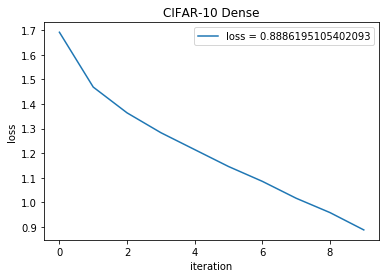

10000/10000 [==============================] - 0s 45us/sample - loss: 1.3491 - acc: 0.5598
[1.349119754600525, 0.5598]


In [49]:
def main():
    (x_train, y_train), (x_test, y_test) = load_data()
    model = get_model(x_train.shape[1], y_train.shape[1])

    model.summary()

    optimizer = k.optimizers.Nadam(0.001)

    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"]
    )

    (model, history) = fit_model(
        model, x_train, y_train, epochs=epochs, 
        filename="cifar10-dense", 
        rebuild=True
    )

    plot(history, title="CIFAR-10 Dense")

    print(model.evaluate(x_test, y_test))
    
main()

## Cifar-100

In [5]:
from tensorflow import keras as k
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import os
from matplotlib import pyplot as plt

In [6]:
num_classes = 100
epochs = 10

In [7]:
## Helper functions

def load_data(verbose=False):
    (x_train, y_train), (x_test, y_test) = k.datasets.cifar100.load_data()

    # Normalization
    mean = np.mean(x_train,axis=(0, 1, 2, 3))
    std = np.std(x_train,axis=(0, 1, 2, 3))
    x_train = (x_train-mean) / (std + 1e-7)
    x_test = (x_test-mean) / (std + 1e-7)

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    
    # Image to matrix
    B_train, B_test = x_train.shape[0], x_test.shape[0]

    x_train = x_train.reshape(B_train, np.prod(x_train.shape[1:]))
    x_test  = x_test.reshape(B_test, np.prod(x_test.shape[1:]))

    # Categorize classes
    y_train = k.utils.to_categorical(y_train, num_classes)
    y_test  = k.utils.to_categorical(y_test, num_classes)

    if verbose:
        print(
            f"Shape of x_train: {x_train.shape}, Shape of y_train: {y_train.shape}\n" +
            f"Shape of x_test:  {x_test.shape }, Shape of y_test:  {y_test.shape}\n"
        )

    return (x_train, y_train), (x_test, y_test)

def get_model(input_dim, output_dim):
    x_i = x = Input((input_dim, ), name="input")
    x = Dense(1200, name="d1")(x)
    x = Activation("relu", name="d1_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(600, name="d2")(x)
    x = Activation("relu", name="d2_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(300, name="d3")(x)
    x = Activation("relu", name="d3_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(600, name="d4")(x)
    x = Activation("relu", name="d4_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(300, name="d5")(x)
    x = Activation("relu", name="d5_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(100, name="d6")(x)
    x = Activation("relu", name="d6_relu")(x)
    x = BatchNormalization()(x)
    x = Dense(output_dim, name="do")(x)
    x = Activation("softmax", name="do_softmax")(x)

    model = k.models.Model(inputs=x_i, outputs=x)
    
    return model

def fit_model(model, x_train, y_train, epochs, filename, rebuild=False):
    if not rebuild and os.path.exists(filename):
        model.load_weights(filename)

    history = model.fit(
        x_train, y_train, batch_size=64, epochs=epochs, 
        validation_split=0.05, 
        verbose=True, 
        shuffle=True
    )
    model.save_weights(filename)

    return (model, history)

def plot(history, title):
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.plot(
        history.history['loss'], 
        label=f"loss = {history.history['loss'][-1]}"
    )
    plt.legend()
    
    plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3072)]            0         
_________________________________________________________________
d1 (Dense)                   (None, 1200)              3687600   
_________________________________________________________________
d1_relu (Activation)         (None, 1200)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1200)              4800      
_________________________________________________________________
d2 (Dense)                   (None, 600)               720600    
_________________________________________________________________
d2_relu (Activation)         (None, 600)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400  

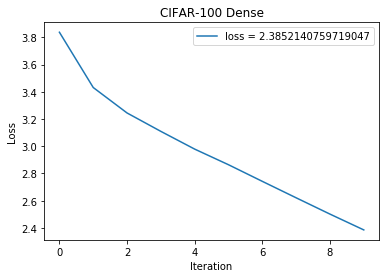

10000/10000 [==============================] - 0s 47us/sample - loss: 3.1580 - acc: 0.2661
[3.157972087097168, 0.2661]


In [9]:
def main():
    (x_train, y_train), (x_test, y_test) = load_data()
    model = get_model(x_train.shape[1], y_train.shape[1])

    model.summary()

    optimizer = k.optimizers.Nadam(0.001)

    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"]
    )

    (model, history) = fit_model(
        model, x_train, y_train, epochs=epochs, 
        filename="cifar100-dense", 
        rebuild=True
    )

    plot(history, title="CIFAR-100 Dense")

    print(model.evaluate(x_test, y_test))
    
main()

## 2. Convolution

## Cifar-10

In [10]:
from tensorflow import keras as k
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import os
from matplotlib import pyplot as plt

In [11]:
num_classes = 10
epochs = 10

In [15]:
## Helper functions

def load_data(verbose=False):
    (x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()

    # Normalization
    mean = np.mean(x_train,axis=(0, 1, 2, 3))
    std = np.std(x_train,axis=(0, 1, 2, 3))
    x_train = (x_train-mean) / (std + 1e-7)
    x_test = (x_test-mean) / (std + 1e-7)

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    
    # Image to matrix
    B_train, B_test = x_train.shape[0], x_test.shape[0]

    # Categorize classes
    y_train = k.utils.to_categorical(y_train, num_classes)
    y_test  = k.utils.to_categorical(y_test, num_classes)

    if verbose:
        print(
            f"Shape of x_train: {x_train.shape}, Shape of y_train: {y_train.shape}\n" +
            f"Shape of x_test:  {x_test.shape }, Shape of y_test:  {y_test.shape}\n"
        )

    return (x_train, y_train), (x_test, y_test)

def get_model(input_dim, output_dim):
    x_i = x = Input(input_dim, name="input")
    x = Conv2D(32, (3,3), strides=2, padding="valid", name="c1")(x)
    x = Activation("relu", name="d1_relu")(x)
    x = Conv2D(64, (3,3), strides=2, padding="valid", name="c2")(x)
    x = Activation("relu", name="d2_relu")(x)
    x = Conv2D(128, (3,3), strides=2, padding="valid", name="c3")(x)
    x = Activation("relu", name="d3_relu")(x)
    x = Conv2D(output_dim, (1, 1), name="do")(x)
    x = GlobalAveragePooling2D(name="gap")(x)
    x = Activation("softmax", name="do_softmax")(x)

    model = k.models.Model(inputs=x_i, outputs=x)

    return model

def fit_model(model, x_train, y_train, epochs, filename, rebuild=False):
    if not rebuild and os.path.exists(filename):
        model.load_weights(filename)

    history = model.fit(
        x_train, y_train, batch_size=64, epochs=epochs, 
        validation_split=0.05, 
        verbose=True, 
        shuffle=True
    )
    model.save_weights(filename)

    return (model, history)

def plot(history, title):
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.plot(
        history.history['loss'], 
        label=f"loss = {history.history['loss'][-1]}"
    )
    plt.legend()
    
    plt.show()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
c1 (Conv2D)                  (None, 15, 15, 32)        896       
_________________________________________________________________
d1_relu (Activation)         (None, 15, 15, 32)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 7, 7, 64)          18496     
_________________________________________________________________
d2_relu (Activation)         (None, 7, 7, 64)          0         
_________________________________________________________________
c3 (Conv2D)                  (None, 3, 3, 128)         73856     
_________________________________________________________________
d3_relu (Activation)         (None, 3, 3, 128)         0   

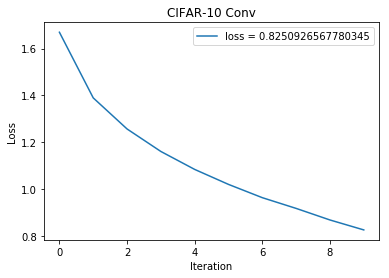

10000/10000 [==============================] - 0s 45us/sample - loss: 1.0122 - acc: 0.6465
[1.0122061485290528, 0.6465]


In [17]:
def main():
    (x_train, y_train), (x_test, y_test) = load_data()
    model = get_model(x_train.shape[1:], y_train.shape[1])

    model.summary()

    optimizer = k.optimizers.Adam(0.001)

    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"]
    )

    (model, history) = fit_model(
        model, x_train, y_train, epochs=epochs, 
        filename="cifar10-dense", 
        rebuild=True
    )

    plot(history, title="CIFAR-10 Conv")

    print(model.evaluate(x_test, y_test))
    
main()

## Cifar-100

In [18]:
from tensorflow import keras as k
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import os
from matplotlib import pyplot as plt

In [19]:
num_classes = 100
epochs = 10

In [20]:
## Helper functions

def load_data(verbose=False):
    (x_train, y_train), (x_test, y_test) = k.datasets.cifar100.load_data()

    # Normalization
    mean = np.mean(x_train,axis=(0, 1, 2, 3))
    std = np.std(x_train,axis=(0, 1, 2, 3))
    x_train = (x_train-mean) / (std + 1e-7)
    x_test = (x_test-mean) / (std + 1e-7)

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    
    # Image to matrix
    B_train, B_test = x_train.shape[0], x_test.shape[0]

    # Categorize classes
    y_train = k.utils.to_categorical(y_train, num_classes)
    y_test  = k.utils.to_categorical(y_test, num_classes)

    if verbose:
        print(
            f"Shape of x_train: {x_train.shape}, Shape of y_train: {y_train.shape}\n" +
            f"Shape of x_test:  {x_test.shape }, Shape of y_test:  {y_test.shape}\n"
        )

    return (x_train, y_train), (x_test, y_test)

def get_model(input_dim, output_dim):
    x_i = x = Input(input_dim, name="input")
    x = Conv2D(32, (3,3), strides=2, padding="valid", name="c1")(x)
    x = Activation("relu", name="d1_relu")(x)
    x = Conv2D(64, (3,3), strides=2, padding="valid", name="c2")(x)
    x = Activation("relu", name="d2_relu")(x)
    x = Conv2D(128, (3,3), strides=2, padding="valid", name="c3")(x)
    x = Activation("relu", name="d3_relu")(x)
    x = Conv2D(output_dim, (1, 1), name="do")(x)
    x = GlobalAveragePooling2D(name="gap")(x)
    x = Activation("softmax", name="do_softmax")(x)

    model = k.models.Model(inputs=x_i, outputs=x)

    return model

def fit_model(model, x_train, y_train, epochs, filename, rebuild=False):
    if not rebuild and os.path.exists(filename):
        model.load_weights(filename)

    history = model.fit(
        x_train, y_train, batch_size=64, epochs=epochs, 
        validation_split=0.05, 
        verbose=True, 
        shuffle=True
    )
    model.save_weights(filename)

    return (model, history)

def plot(history, title):
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.plot(
        history.history['loss'], 
        label=f"loss = {history.history['loss'][-1]}"
    )
    plt.legend()
    
    plt.show()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
c1 (Conv2D)                  (None, 15, 15, 32)        896       
_________________________________________________________________
d1_relu (Activation)         (None, 15, 15, 32)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 7, 7, 64)          18496     
_________________________________________________________________
d2_relu (Activation)         (None, 7, 7, 64)          0         
_________________________________________________________________
c3 (Conv2D)                  (None, 3, 3, 128)         73856     
_________________________________________________________________
d3_relu (Activation)         (None, 3, 3, 128)         0   

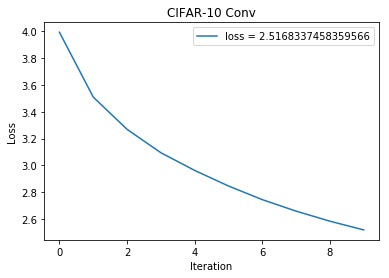

10000/10000 [==============================] - 0s 43us/sample - loss: 2.8048 - acc: 0.3130
[2.804824971008301, 0.313]


In [21]:
def main():
    (x_train, y_train), (x_test, y_test) = load_data()
    model = get_model(x_train.shape[1:], y_train.shape[1])

    model.summary()

    optimizer = k.optimizers.Adam(0.001)

    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"]
    )

    (model, history) = fit_model(
        model, x_train, y_train, epochs=epochs, 
        filename="cifar10-dense", 
        rebuild=True
    )

    plot(history, title="CIFAR-10 Conv")

    print(model.evaluate(x_test, y_test))
    
main()

In [33]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import regularizers, optimizers
import numpy as np


(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 100
y_train = utils.to_categorical(y_train,num_classes)
y_test = utils.to_categorical(y_test,num_classes)

baseMapNum = 32
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

#training
batch_size = 64
epochs=10
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save_weights('cifar10_normal_rms_ep75.h5')

# opt_rms = keras.optimizers.RMSprop(lr=0.0005,decay=1e-6)
# model.compile(loss='categorical_crossentropy',
#         optimizer=opt_rms,
#         metrics=['accuracy'])
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
# model.save_weights('cifar10_normal_rms_ep100.h5')

# opt_rms = keras.optimizers.RMSprop(lr=0.0003,decay=1e-6)
# model.compile(loss='categorical_crossentropy',
#         optimizer=opt_rms,
#         metrics=['accuracy'])
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
# model.save_weights('cifar10_normal_rms_ep125.h5')

#testing - no kaggle eval
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_87 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [84]:
scores = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print(scores)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.7628 - accuracy: 0.7858
[0.7627679752349854, 0.7858]


In [39]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import sys
import os


batch_size = 64
num_classes = 100
epochs = 10
model_name = 'keras_cifar10_model'
save_dir = '/model/' + model_name

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 80us/sample - loss: 4.5199 - accuracy: 0.0227 - val_loss: 4.3008 - val_accuracy: 0.0363
Epoch 2/10
40000/40000 [==============================] - 3s 71us/sample - loss: 4.1457 - accuracy: 0.0584 - val_loss: 4.0116 - val_accuracy: 0.0872
Epoch 3/10
40000/40000 [==============================] - 3s 71us/sample - loss: 3.9251 - accuracy: 0.0878 - val_loss: 3.8217 - val_accuracy: 0.1326
Epoch 4/10
40000/40000 [==============================] - 3s 72us/sample - loss: 3.7778 - accuracy: 0.1121 - val_loss: 3.6361 - val_accuracy: 0.1483
Epoch 5/10
40000/40000 [==============================] - 3s 71us/sample - loss: 3.6391 - accuracy: 0.1351 - val_loss: 3.5207 - val_accuracy: 0.1752
Epoch 6/10
40000/40000 [==============================] - 3s 71us/sample - loss: 3.5354 - accuracy: 0.1516 - val_loss: 3.3943 - val_accuracy: 0.1985
Epoch 7/10
40000/40000 [==============================] 